In [2]:
# Importing dependencies
import json
import pandas as pd
import numpy as np
import re

In [3]:
# Defining file location
file_dir = r'C:\Users\dhanu\Desktop\Analysis Project\Movies ETL\Movies-ETL\Resources'

In [4]:
# Reading file as dictionaries
with open (f'{file_dir}\wikipedia-movies.json') as file:
    wiki_data=json.load(file)

In [5]:
len(wiki_data)

7311

In [6]:
wiki_data[3750]

{'url': 'https://en.wikipedia.org/wiki/Ray_(film)',
 'year': 2004,
 'imdb_link': 'https://www.imdb.com/title/tt0350258/',
 'title': 'Ray',
 'Directed by': 'Taylor Hackford',
 'Produced by': ['Taylor Hackford',
  'Stuart Benjamin',
  'Howard Baldwin',
  'Karen Baldwin'],
 'Screenplay by': 'James L. White',
 'Story by': ['Taylor Hackford', 'James L. White'],
 'Starring': ['Jamie Foxx',
  'Kerry Washington',
  'Clifton Powell',
  'Harry Lennix',
  'Terrence Howard',
  'Larenz Tate',
  'Richard Schiff',
  'Regina King'],
 'Music by': 'Craig Armstrong',
 'Cinematography': 'Paweł Edelman',
 'Edited by': 'Paul Hirsch',
 'Productioncompany ': ['Bristol Bay Productions',
  'Anvil Films',
  'Baldwin Entertainment Group'],
 'Distributed by': 'Universal Pictures',
 'Release date': ['October 29, 2004', '(', '2004-10-29', ')'],
 'Running time': '152 minutes',
 'Country': 'United States',
 'Language': 'English',
 'Budget': '$40 million',
 'Box office': '$124.7 million'}

In [118]:
# Importing movie rating data as df
movie_metadata=pd.read_csv(f'{file_dir}\movies_metadata.csv',low_memory=False)
ratings=pd.read_csv(f'{file_dir}\\ratings.csv')

In [111]:
movie_metadata.sample(6)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
21856,False,NaN,0,"[{'id': 14, 'name': 'Fantasy'}, {'id': 12, 'na...",NaN,113194,tt1515725,en,A Trip to Mars,The obvious inspiration for this short film is...,...,1910-02-18,0.0,5.0,[],Released,NaN,A Trip to Mars,False,7.0,4.0
43688,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,167707,tt0066739,pt,Uma Abelha na Chuva,This Portuguese drama examines the daily life ...,...,1972-04-13,0.0,66.0,"[{'iso_639_1': 'pt', 'name': 'Português'}]",Released,NaN,A Bee in the Rain,False,6.2,3.0
7977,False,NaN,191051,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,42347,tt0097373,en,For Queen & Country,A retired British soldier struggles to adjust ...,...,1988-05-17,0.0,105.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,For Queen & Country,False,5.3,14.0
32028,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",NaN,314220,tt3526706,el,Chevalier,"In the middle of the Aegean Sea, six men on a ...",...,2015-11-26,0.0,105.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Buddy Movie Without The Buddies,Chevalier,False,6.0,22.0
32694,False,NaN,0,[],NaN,267815,tt3907090,en,Los ausentes,An old man lives alone in a shabby cabin in a ...,...,2014-08-11,0.0,80.0,"[{'iso_639_1': 'es', 'name': 'Español'}]",Released,NaN,The Absent,False,5.0,1.0
15643,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10769, 'n...",NaN,21781,tt0407821,ko,거미숲,A recently widowed TV producer is drawn to an ...,...,2004-09-03,0.0,112.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Spider Forest,False,6.7,33.0


In [9]:
ratings.sample(6)

,userId,movieId,rating,timestamp
24626595,255926,66934,3.0,1391639415
11655700,120923,2530,3.0,945463485
4613128,47380,1587,3.0,1462578635
6469436,66765,8645,3.0,1225649881
16939760,176058,592,5.0,1484884456
19596861,203577,1242,5.0,1030730151


# Cleanup of the json file (wiki data)

In [10]:
# Converting wiki data to df
wiki_movies_df=pd.DataFrame(wiki_data)
wiki_movies_df.sample(5)

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Predecessor,Founders,Area served,Products,Services,Russian,Hebrew,Revenue,Operating income,Polish
5513,https://en.wikipedia.org/wiki/Hesher_(film),2011.0,https://www.imdb.com/title/tt1403177/,Hesher,Spencer Susser,"[Natalie Portman, Spencer Susser, Morgan Susse...","[Spencer Susser, David Michôd]",Brian Charles Frank,NaN,"[Joseph Gordon-Levitt, Rainn Wilson, Natalie P...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1824,https://en.wikipedia.org/wiki/A_Thin_Line_Betw...,1996.0,https://www.imdb.com/title/tt0117891/,A Thin Line Between Love and Hate,Martin Lawrence,"[George Jackson, Doug McHenry]","[Martin Lawrence, Bentley Kyle Evans, Kenny Bu...",Martin Lawrence,NaN,"[Martin Lawrence, Lynn Whitfield, Regina King,...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4820,https://en.wikipedia.org/wiki/The_Deal_(2008_f...,2008.0,https://www.imdb.com/title/tt0848281/,The Deal,Steven Schachter,"[Irene Litinsky, Keri Nakamoto, Michael Prupas]",NaN,NaN,"[The Deal, by, Peter Lefcourt]","[William H. Macy, Meg Ryan, Jason Ritter, Elli...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2438,https://en.wikipedia.org/wiki/Spice_World_(film),1998.0,https://www.imdb.com/title/tt0120185/,Spice World,Bob Spiers,"[Uri Fruchtmann, Barnaby Thompson]",Kim Fuller,NaN,"[""An idea"", by the, Spice Girls, and Kim Fuller]","[Victoria, Emma, Mel C, Geri, Mel B, Richard E...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1728,https://en.wikipedia.org/wiki/Maximum_Risk,1996.0,https://www.imdb.com/title/tt0117011/,Maximum Risk,Ringo Lam,Moshe Diamant,NaN,NaN,NaN,"[Jean-Claude Van Damme, Natasha Henstridge]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# List of columns - Can't print all columns if it is not converted to list
wiki_movies_df.columns.to_list()

['url',
 'year',
 'imdb_link',
 'title',
 'Directed by',
 'Produced by',
 'Screenplay by',
 'Story by',
 'Based on',
 'Starring',
 'Narrated by',
 'Music by',
 'Cinematography',
 'Edited by',
 'Productioncompany ',
 'Distributed by',
 'Release date',
 'Running time',
 'Country',
 'Language',
 'Budget',
 'Box office',
 'Written by',
 'Genre',
 'Theme music composer',
 'Country of origin',
 'Original language(s)',
 'Producer(s)',
 'Editor(s)',
 'Production company(s)',
 'Original network',
 'Original release',
 'Productioncompanies ',
 'Executive producer(s)',
 'Production location(s)',
 'Distributor',
 'Picture format',
 'Audio format',
 'Voices of',
 'Followed by',
 'Composer(s)',
 'Created by',
 'Also known as',
 'Opening theme',
 'No. of episodes',
 'Preceded by',
 'Author',
 'Publisher',
 'Publication date',
 'Media type',
 'Pages',
 'ISBN',
 'OCLC',
 'LC Class',
 'Cover artist',
 'Series',
 'Set in',
 'Adaptation by',
 'Suggested by',
 'Biographical data',
 'Born',
 'Died',
 'Resti

In [12]:
# Filtering only movies with IMDB link and Director

wiki_movies = [movie for movie in wiki_data
              if ('Director' in movie or 'Directed by' in movie)
              and 'imdb_link' in movie
              and 'No. of episodes' not in movie]
len(wiki_movies)

7076

In [13]:
# Converting to df
wiki_movies_df = pd.DataFrame (wiki_movies)
wiki_movies_df.head()

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,Renny Harlin,"[Steve Perry, Joel Silver]","[David Arnott, James Cappe, Daniel Waters]","[David Arnott, James Cappe]","[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet",James Foley,"[Ric Kidney, Robert Redlin]","[James Foley, Robert Redlin]",NaN,"[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,Roger Spottiswoode,Daniel Melnick,"[John Eskow, Richard Rush]",NaN,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,Woody Allen,Robert Greenhut,NaN,NaN,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,John Cornell,John Cornell,NaN,NaN,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# Identifying movies by language - Arabic
wiki_movies_df[wiki_movies_df["Arabic"].notnull()]

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
6834,https://en.wikipedia.org/wiki/The_Insult_(film),2018,https://www.imdb.com/title/tt7048622/,The Insult,Ziad Doueiri,"[Rachid Bouchareb, Jean Bréhat, Julie Gayet, A...",NaN,NaN,NaN,"[Adel Karam, Kamel El Basha]",...,NaN,Case No. 23,NaN,NaN,NaN,قضية رقم ٢٣,Qadiyya raqm 23,NaN,NaN,NaN
7058,https://en.wikipedia.org/wiki/Capernaum_(film),2018,https://www.imdb.com/title/tt8267604/,Capernaum,Nadine Labaki,"[Michel Merkt, Khaled Mouzanar]","[Nadine Labaki, Jihad Hojaily, Michelle Keserw...","[Georges Khabbaz, Nadine Labaki, Michelle Kese...",NaN,"[Zain Al Rafeea, Yordanos Shiferaw, Boluwatife...",...,NaN,NaN,NaN,NaN,NaN,کفرناحوم‎,NaN,NaN,NaN,NaN


In [15]:
# Identifying alternate title in diff languages
sorted(wiki_movies_df.columns.tolist())

['Adaptation by',
 'Also known as',
 'Animation by',
 'Arabic',
 'Audio format',
 'Based on',
 'Box office',
 'Budget',
 'Cantonese',
 'Chinese',
 'Cinematography',
 'Color process',
 'Composer(s)',
 'Country',
 'Country of origin',
 'Created by',
 'Directed by',
 'Director',
 'Distributed by',
 'Distributor',
 'Edited by',
 'Editor(s)',
 'Executive producer(s)',
 'Followed by',
 'French',
 'Genre',
 'Hangul',
 'Hebrew',
 'Hepburn',
 'Japanese',
 'Label',
 'Language',
 'Length',
 'Literally',
 'Mandarin',
 'McCune–Reischauer',
 'Music by',
 'Narrated by',
 'Original language(s)',
 'Original network',
 'Original release',
 'Original title',
 'Picture format',
 'Polish',
 'Preceded by',
 'Produced by',
 'Producer',
 'Producer(s)',
 'Production company(s)',
 'Production location(s)',
 'Productioncompanies ',
 'Productioncompany ',
 'Recorded',
 'Release date',
 'Released',
 'Revised Romanization',
 'Romanized',
 'Running time',
 'Russian',
 'Screen story by',
 'Screenplay by',
 'Simplifie

In [16]:
# Analysis of dupicate columns
wiki_movies_df[(wiki_movies_df['Voices of'].notnull()) &(wiki_movies_df['Narrated by'].notnull())][['Voices of','Narrated by']]

,Voices of,Narrated by


In [17]:
# Defining a function to clean movies
def clean_movie(movie):
    movie=dict(movie) # Create a non-destructive copy
    
    # Combining multiple fields for alternate language titles into one
    alt_titles={}
    alt_lang=['Also known as','Arabic','Cantonese','Chinese','French',
                'Hangul','Hebrew','Hepburn','Japanese','Literally',
                'Mandarin','McCune–Reischauer','Original title','Polish',
                'Revised Romanization','Romanized','Russian',
                'Simplified','Traditional','Yiddish']
    for lang in alt_lang:
        if lang in movie:
            alt_titles[lang]=movie[lang]
            movie.pop(lang) 
    if len(alt_titles)>0:
        movie["Alternate Titles"] = alt_titles
        
     # Combining duplicate fields into one
    def change_column_name (old_name,new_name):
        if old_name in movie:
            movie[new_name]=movie.pop(old_name)
            
    change_column_name('Directed by','Director')
    change_column_name('Distributed by','Distributor')
    change_column_name('Edited by','Editor(s)')
    change_column_name('Produced by','Producer')
    change_column_name('Producer','Producer(s)')
    change_column_name('Productioncompanies ','Productioncompany ')
    change_column_name('Productioncompany ','Production company(s)')
    change_column_name('Country','Country of origin')
    change_column_name('Adaptation by','Writer(s)')
    change_column_name('Length','Running time')
    change_column_name('Music by','Composer(s)')
    change_column_name('Adaptation by','Writer (s)')
    change_column_name('Original release','Release date')
    change_column_name('Language','Original language(s)')
    change_column_name('Released', 'Release date')
    change_column_name('Screen story by', 'Writer(s)')
    change_column_name('Screenplay by', 'Writer(s)')
    change_column_name('Story by', 'Writer(s)')
    change_column_name('Theme music composer', 'Composer(s)')
    change_column_name('Written by', 'Writer(s)')
    change_column_name('Voices of','Narrated by')

    
    return movie

In [18]:
# Looping through every element in the dict and assigning the cleaned results to a df
clean_movies=[clean_movie(movie) for movie in wiki_movies]
wiki_movies_df=pd.DataFrame(clean_movies)
sorted(wiki_movies_df.columns.tolist())

['Alternate Titles',
 'Animation by',
 'Audio format',
 'Based on',
 'Box office',
 'Budget',
 'Cinematography',
 'Color process',
 'Composer(s)',
 'Country of origin',
 'Created by',
 'Director',
 'Distributor',
 'Editor(s)',
 'Executive producer(s)',
 'Followed by',
 'Genre',
 'Label',
 'Narrated by',
 'Original language(s)',
 'Original network',
 'Picture format',
 'Preceded by',
 'Producer(s)',
 'Production company(s)',
 'Production location(s)',
 'Recorded',
 'Release date',
 'Running time',
 'Starring',
 'Suggested by',
 'Venue',
 'Writer(s)',
 'imdb_link',
 'title',
 'url',
 'year']

In [19]:
# Extract IMDB ID
wiki_movies_df["IMDB ID"] = wiki_movies_df["imdb_link"].str.extract(r"(tt\d{7})")
wiki_movies_df["IMDB ID"].head()

0    tt0098987
1    tt0098994
2    tt0099005
3    tt0099012
4    tt0099018
Name: IMDB ID, dtype: object

In [20]:
print(len(wiki_movies_df))
wiki_movies_df.drop_duplicates(subset="IMDB ID",inplace=True)
print(len(wiki_movies_df))
wiki_movies_df.head()

7076
7033


,url,year,imdb_link,title,Based on,Starring,Narrated by,Cinematography,Release date,Running time,...,Created by,Preceded by,Suggested by,Alternate Titles,Recorded,Venue,Label,Animation by,Color process,IMDB ID
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,"[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...","Andrew ""Dice"" Clay",Oliver Wood,"[July 11, 1990, (, 1990-07-11, )]",102 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0098987
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet","[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",NaN,Mark Plummer,"[May 17, 1990, (, 1990-05-17, ), (Cannes Film ...",114 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0098994
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",NaN,Roger Deakins,"[August 10, 1990, (, 1990-08-10, )]",113 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0099005
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",NaN,Carlo Di Palma,"[December 25, 1990, (, 1990-12-25, )]",106 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0099012
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",NaN,Russell Boyd,"December 19, 1990",95 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0099018


In [21]:
# Removing columns with less than 10% data
columns_to_keep=[column for column in wiki_movies_df.columns if (wiki_movies_df[column].isna().sum())/len(wiki_movies_df) <0.9]
wiki_movies_df=wiki_movies_df[columns_to_keep]
wiki_movies_df.dtypes

url                      object
year                      int64
imdb_link                object
title                    object
Based on                 object
Starring                 object
Cinematography           object
Release date             object
Running time             object
Budget                   object
Box office               object
Director                 object
Distributor              object
Editor(s)                object
Producer(s)              object
Production company(s)    object
Country of origin        object
Composer(s)              object
Original language(s)     object
Writer(s)                object
IMDB ID                  object
dtype: object

In [22]:
# Identifying non string values in box office data
box_office = wiki_movies_df["Box office"].dropna()
box_office[box_office.map(lambda x: type(x)!=str)]

34                           [US$, 4,212,828]
54      [$6,698,361 (, United States, ), [2]]
74                    [$6,488,144, (US), [1]]
126                [US$1,531,489, (domestic)]
130                          [US$, 4,803,039]
                        ...                  
6980               [$99.6, million, [4], [5]]
6994                   [$365.6, million, [1]]
6995                         [$53.8, million]
7015                     [$435, million, [7]]
7048                   [$529.3, million, [4]]
Name: Box office, Length: 135, dtype: object

In [23]:
# Combining all elements in list to a single string
box_office=box_office.apply(lambda x: " ".join(x) if type(x)==list else x)
box_office[box_office.map(lambda x: type(x)!=str)]

Series([], Name: Box office, dtype: object)

In [24]:
# Converting ranges to multiple value format
box_office=box_office.str.replace(r"\$.*[-–—](?![a-z])","$",regex=True)

In [25]:
# Form 1 of the regex exp
form_one=r"\$\s*\d+\.?\d*\s*[mb]illi?on"
matches_form_one=box_office.str.contains(form_one,flags=re.IGNORECASE,na=False)

In [26]:
# Form 2 of the regex exp
form_two= r"\$\s*\d{1,3}(?:[\.,]\d{3})+(?!\s[mb]illion)"  
matches_form_two=box_office.str.contains(form_two,flags=re.IGNORECASE,na=False)

In [27]:
# Checking to identify strings that don't match
box_office[(~matches_form_one) & (~matches_form_two)]

600                      $5000 (US)
1070                     35,254,617
1480                     £3 million
1865                   ¥1.1 billion
2032                            N/A
2091                           $309
2665    926,423 admissions (France)
3631                            TBA
3879       CN¥3.650 million (China)
4116                     £7,385,434
4306                            $30
4561        $45.2k (only in Turkey)
5447                          £2.56
5784                       413 733$
6013                        Unknown
6369                          $111k
6370                           $588
6593                 less than $372
6843                        8 crore
Name: Box office, dtype: object

In [28]:
# Matches both forms
box_office[(matches_form_one) & (matches_form_two)]

4930      $36.1 million [1] $8,610,119 (US DVD sales) [3]
6358    $18,687,388 (Theatrical Performance) [4] $1,26...
Name: Box office, dtype: object

In [29]:
box_office.str.extract(f"({form_one}|{form_two})")

,0
0,$21.4 million
1,$2.7 million
2,"$57,718,089"
3,"$7,331,647"
4,"$6,939,946"
...,...
7070,$19.4 million
7071,$41.9 million
7072,$76.1 million
7073,$38.4 million


In [30]:
def parse_dollars(s):
    # if s is not a string, return NaN
    if type(s)!=str:
        return np.nan

    # if input is of the form $###.# million
    if re.match("\$\s*\d+\.?\d*\s*milli?on",s,flags=re.IGNORECASE):

        # remove dollar sign and " million"
        s = re.sub("\$|\s|[a-zA-Z]",'',s)
        # convert to float and multiply by a million
        value=float(s)*10**6
        # return value
        return value

    # if input is of the form $###.# billion
    elif re.match("\$\s*\d+\.?\d*\s*billi?on",s,flags=re.IGNORECASE):
        # remove dollar sign and " billion"
        s=re.sub("\$|\s|[a-zA-Z]",'',s)
        # convert to float and multiply by a billion
        value=float(s)*10**9
        # return value
        return value

    # if input is of the form $###,###,###
    elif re.match("\$\s*\d{1,3}(?:[\.,]\d{3})+(?!\s[mb]illion)",s,flags=re.IGNORECASE):
        # remove dollar sign and commas
        s = re.sub("\$|\s|,",'',s)
        # convert to float
        value=float(s)
        # return value
        return value
    # otherwise, return NaN
    else:
        return np.nan

In [31]:
wiki_movies_df["box_office"]=box_office.str.extract(f"({form_one}|{form_two})",flags=re.IGNORECASE)[0].apply(parse_dollars)

In [32]:
wiki_movies_df.drop('Box office',axis=1,inplace=True)

In [33]:
wiki_movies_df.head()

,url,year,imdb_link,title,Based on,Starring,Cinematography,Release date,Running time,Budget,...,Distributor,Editor(s),Producer(s),Production company(s),Country of origin,Composer(s),Original language(s),Writer(s),IMDB ID,box_office
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,"[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",Oliver Wood,"[July 11, 1990, (, 1990-07-11, )]",102 minutes,$20 million,...,20th Century Fox,Michael Tronick,"[Steve Perry, Joel Silver]",Silver Pictures,United States,"[Cliff Eidelman, Yello]",English,"[David Arnott, James Cappe]",tt0098987,21400000.0
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet","[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",Mark Plummer,"[May 17, 1990, (, 1990-05-17, ), (Cannes Film ...",114 minutes,$6 million,...,Avenue Pictures,Howard E. Smith,"[Ric Kidney, Robert Redlin]",Avenue Pictures,United States,Maurice Jarre,English,"[James Foley, Robert Redlin]",tt0098994,2700000.0
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",Roger Deakins,"[August 10, 1990, (, 1990-08-10, )]",113 minutes,$35 million,...,TriStar Pictures,"[John Bloom, Lois Freeman-Fox]",Daniel Melnick,"[Carolco Pictures, IndieProd Company]",United States,Charles Gross,"[English, Lao]","[John Eskow, Richard Rush]",tt0099005,57718089.0
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",Carlo Di Palma,"[December 25, 1990, (, 1990-12-25, )]",106 minutes,$12 million,...,Orion Pictures,Susan E. Morse,Robert Greenhut,NaN,United States,NaN,English,Woody Allen,tt0099012,7331647.0
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",Russell Boyd,"December 19, 1990",95 minutes,$25 million,...,Paramount Pictures,David Stiven,John Cornell,NaN,US,Maurice Jarre,English,Paul Hogan,tt0099018,6939946.0


In [34]:
# Budget data prep
budget=wiki_movies_df["Budget"].dropna()

In [35]:
# Checking for non string values
budget[budget.map(lambda x:type(x)!=str)]

16                    [$2,500,000, [, citation needed, ]]
100                       [£960,000, [2], ($1.5 million)]
135                                     [USD$, 9 million]
142      [$23 million (estimated), [, citation needed, ]]
151                  [$14 million, [, citation needed, ]]
                              ...                        
6994                                  [$22, million, [1]]
6995                                     [$22.8, million]
7015                                  [$36, million, [6]]
7018    [$70 million (gross), [3], [4], $59 million (n...
7048                                 [$175, million, [4]]
Name: Budget, Length: 184, dtype: object

In [36]:
# Converting list to string
budget=budget.map(lambda x:" ".join(x) if type(x)==list else x)
budget[budget.map(lambda x:type(x)!=str)]

Series([], Name: Budget, dtype: object)

In [37]:
# Converting ranges to single strings
budget=budget.str.replace(r'\$.*[-–—](?![a-z])','$',regex=True)
# Removing citations
budget = budget.str.replace(r'\[\d+\]\s*', '',regex=True)

In [38]:
# Form 1 of the regex exp
form_one=r"\$\s*\d+\.?\d*\s*[mb]illi?on"
matches_form_one=budget.str.contains(form_one,flags=re.IGNORECASE,na=False)
# Form 2 of the regex exp
form_two= r"\$\s*\d{1,3}(?:[\.,]\d{3})+(?!\s[mb]illion)"  
matches_form_two=budget.str.contains(form_two,flags=re.IGNORECASE,na=False)

In [39]:
# Checking to identify strings that don't match
budget[(~matches_form_one) & (~matches_form_two)]

136                         Unknown
204     60 million Norwegian Kroner
478                         Unknown
1226                        Unknown
1278                            HBO
1374                     £6,000,000
1397                     13 million
1480                   £2.8 million
1734                   CAD2,000,000
1913     PHP 85 million (estimated)
1948                    102,888,900
1953                   3,500,000 DM
1973                     ₤2,300,874
2281                     $14 milion
2451                     ₤6,350,000
3144                   € 40 million
3418                        $218.32
3802                   £4.2 million
3906                            N/A
3959                    760,000 USD
4470                       19 crore
4641                    £17 million
5424                            N/A
5447                     £4 million
5671                    €14 million
5687                   $ dead link]
6385                  £ 12 million 
6593                     £3 

In [40]:
# Formatting it into a common format using parse dollars function
wiki_movies_df["budget"]=budget.str.extract(f"({form_one}|{form_two})",flags=re.IGNORECASE)[0].apply(parse_dollars)

In [41]:
# Removing the original field
wiki_movies_df.drop("Budget",axis=1,inplace=True)

In [42]:
wiki_movies_df.head()

,url,year,imdb_link,title,Based on,Starring,Cinematography,Release date,Running time,Director,...,Editor(s),Producer(s),Production company(s),Country of origin,Composer(s),Original language(s),Writer(s),IMDB ID,box_office,budget
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,"[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",Oliver Wood,"[July 11, 1990, (, 1990-07-11, )]",102 minutes,Renny Harlin,...,Michael Tronick,"[Steve Perry, Joel Silver]",Silver Pictures,United States,"[Cliff Eidelman, Yello]",English,"[David Arnott, James Cappe]",tt0098987,21400000.0,20000000.0
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet","[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",Mark Plummer,"[May 17, 1990, (, 1990-05-17, ), (Cannes Film ...",114 minutes,James Foley,...,Howard E. Smith,"[Ric Kidney, Robert Redlin]",Avenue Pictures,United States,Maurice Jarre,English,"[James Foley, Robert Redlin]",tt0098994,2700000.0,6000000.0
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",Roger Deakins,"[August 10, 1990, (, 1990-08-10, )]",113 minutes,Roger Spottiswoode,...,"[John Bloom, Lois Freeman-Fox]",Daniel Melnick,"[Carolco Pictures, IndieProd Company]",United States,Charles Gross,"[English, Lao]","[John Eskow, Richard Rush]",tt0099005,57718089.0,35000000.0
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",Carlo Di Palma,"[December 25, 1990, (, 1990-12-25, )]",106 minutes,Woody Allen,...,Susan E. Morse,Robert Greenhut,NaN,United States,NaN,English,Woody Allen,tt0099012,7331647.0,12000000.0
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",Russell Boyd,"December 19, 1990",95 minutes,John Cornell,...,David Stiven,John Cornell,NaN,US,Maurice Jarre,English,Paul Hogan,tt0099018,6939946.0,25000000.0


In [64]:
# Parsing release date
# Retrieving data and converting lists to strings
release_date=wiki_movies_df["Release date"].dropna().apply(lambda x: " ".join(x) if type(x)==list else x)
release_date[release_date.map(lambda x: type(x)!=str)]

Series([], Name: Release date, dtype: object)

In [65]:
#Type of dates
date_form_one=r"(?:January|February|March|April|May|June|July|August|September|October|November|December)\s[0123]?\d,\s*\d{4}"
date_form_two=r"\d{4}.[01]\d.[0123]\d" # Not including question mark after digits since they have to be of this format, 
                                        #else 1980-1991 etc. gets included
date_form_three=r"(?:January|February|March|April|May|June|July|August|September|October|November|December)\s*\d{4}"
date_form_four=r"\d{4}"



In [66]:
wiki_movies_df['release_date']=pd.to_datetime(release_date.str.extract(f"({date_form_one}|{date_form_two}|{date_form_three}|{date_form_four})",flags=re.IGNORECASE)[0],infer_datetime_format=True)

In [67]:
# Parsing running
# Retrieving data and converting lists to strings
running_time=wiki_movies_df["Running time"].dropna().apply(lambda x: " ".join(x) if type(x)==list else x)
running_time[running_time.map(lambda x: type(x)!=str)]

Series([], Name: Running time, dtype: object)

In [72]:
# Types of time
running_time.str.contains(r'^\d*\s*minutes$', flags=re.IGNORECASE, na=False).sum()
running_time[running_time.str.contains(r'^\d*\s*minutes$', flags=re.I, na=False)!=True]

9                                                 102 min
26                                                 93 min
28                                                32 min.
34                                                101 min
35                                                 97 min
                              ...                        
6500       114 minutes [1] 120 minutes (extended edition)
6643                                             104 mins
6709    90 minutes (theatrical) [1] 91 minutes (unrate...
7057    108 minutes (Original cut) 98 minutes (UK cut)...
7075                Variable; 90 minutes for default path
Name: Running time, Length: 366, dtype: object

In [73]:
# Updating form to check
running_time.str.contains(r'^\d*\s*m', flags=re.IGNORECASE, na=False).sum()
running_time[running_time.str.contains(r'^\d*\s*m', flags=re.I, na=False)!=True]

668                     UK:84 min (DVD version) US:86 min
727                         78-102 min (depending on cut)
840                       Varies (79 [3] –84 [1] minutes)
1347                                              25 : 03
1443    United States: 77 minutes Argentina: 94 minute...
1499                                            1hr 35min
1551                                               varies
1774                    Netherlands:96 min, Canada:95 min
1777                                       approx. 14 min
2273                                           1 h 43 min
2993                                               1h 48m
3925                                              4 hours
4425    US domestic version: 86 minutes Original versi...
4967    Theatrical cut: 97 minutes Unrated cut: 107 mi...
5424                    115 [1] /123 [2] /128 [3] minutes
5447                                    1 hour 32 minutes
7075                Variable; 90 minutes for default path
Name: Running 

In [74]:
# Removing the caret(^) constraint
running_time.str.contains(r'\d*\s*m', flags=re.IGNORECASE, na=False).sum()
running_time[running_time.str.contains(r'\d*\s*m', flags=re.I, na=False)!=True]

1347    25 : 03
1551     varies
3925    4 hours
Name: Running time, dtype: object

In [82]:
# Extracting time
time_form_one=r'(\d*)\s*m'
time_form_two=r'(\d+)\s*ho?u?r?s?\s*(\d*)\s*'
running_time_extract=running_time.str.extract(f"{time_form_one}|{time_form_two}",flags=re.I)
running_time_extract[running_time_extract[1].notnull()]

,0,1,2
1499,NaN,1,35
2273,NaN,1,43
2993,NaN,1,48
3925,NaN,4,
5447,NaN,1,32


In [84]:
# Converting time to numeric
running_time_extract = running_time_extract.apply(lambda col: pd.to_numeric(col, errors='coerce')).fillna(0)

In [91]:
# Combining all data, and converting hrs to minutes
wiki_movies_df['running_time'] = running_time_extract.apply(lambda row: row[1]*60 + row[2] if row[0] == 0 else row[0], axis=1)

In [92]:
wiki_movies_df.drop('Running time', axis=1, inplace=True)

# Cleanup of Kaggle data

In [93]:
movie_metadata.dtypes

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

In [102]:
movie_metadata["video"].value_counts()

False    45367
True        93
Name: video, dtype: int64

In [105]:
movie_metadata[~movie_metadata["adult"].isin(["True","False"])] # Going to be dropped since data is too scrambled

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
19730,- Written by Ørnås,0.065736,/ff9qCepilowshEtG2GYWwzt2bs4.jpg,"[{'name': 'Carousel Productions', 'id': 11176}...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",1997-08-20,0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29503,Rune Balot goes to a casino connected to the ...,1.931659,/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg,"[{'name': 'Aniplex', 'id': 2883}, {'name': 'Go...","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-09-29,0,68.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,...,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35587,Avalanche Sharks tells the story of a bikini ...,2.185485,/zaSf5OG7V8X8gqFvly88zDdRm46.jpg,"[{'name': 'Odyssey Media', 'id': 17161}, {'nam...","[{'iso_3166_1': 'CA', 'name': 'Canada'}]",2014-01-01,0,82.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [119]:
# Collecting only non-adult movies
movie_metadata=movie_metadata[movie_metadata["adult"]=="False"].drop("adult",axis='columns')

In [121]:
# Retrieving the boolean result and assigning it back to the column
movie_metadata["video"]=(movie_metadata["video"]=="True")

In [124]:
# Converting to numeric
movie_metadata['budget'] = movie_metadata['budget'].astype(int)
movie_metadata['id'] = pd.to_numeric(movie_metadata['id'], errors='raise')
movie_metadata['popularity'] = pd.to_numeric(movie_metadata['popularity'], errors='raise')

In [125]:
# Converting release date to date
movie_metadata["release_date"]=pd.to_datetime(movie_metadata["release_date"],infer_datetime_format=True)

In [126]:
ratings.info(null_counts=True)

C:\Users\dhanu\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  """Entry point for launching an IPython kernel.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26024289 entries, 0 to 26024288
Data columns (total 4 columns):
 #   Column     Non-Null Count     Dtype  
---  ------     --------------     -----  
 0   userId     26024289 non-null  int64  
 1   movieId    26024289 non-null  int64  
 2   rating     26024289 non-null  float64
 3   timestamp  26024289 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 794.2 MB


In [127]:
# Converting rating timestamp to datetime format from UNIX format
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')

count          26,024,289.00
mean                    3.53
std                     1.07
min                     0.50
25%                     3.00
50%                     3.50
75%                     4.00
max                     5.00
Name: rating, dtype: float64

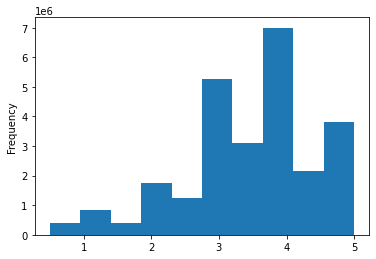

In [131]:
pd.options.display.float_format = '{:20,.2f}'.format
ratings['rating'].plot(kind='hist')
ratings['rating'].describe()